<a href="https://colab.research.google.com/github/thais-damasio/obfuscation/blob/main/ObfuscationModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **POJ Dataset**

---

#### **1) Installing Libraries**

In [192]:
%pip install -q seaborn
%pip install -q keras

#### **2) Libraries of the project**

In [193]:
import matplotlib.pyplot as plt
from keras.models import Sequential, Input
from tensorflow import keras 
from keras.layers import Dense
import seaborn as sns
import pandas as pd
import numpy as np

#### **3) Loading the Dataset**

In [194]:
url="../features/POJ/poj_features_O0.csv"
df = pd.read_csv(url, skipinitialspace=True)

#### **4) Remove columns that don't have any ocurrence**

In [195]:
# Select only the columns that have some ocurrence
cols = []
for col in df.columns:
  if df[col].sum() > 0:
    cols.append(col)
df = df[cols]

print("It was selected {0} columns:".format(len(cols)))
print(cols)

It was selected 43 columns:
['1', '2', '3', '7', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '25', '27', '28', '29', '30', '31', '32', '33', '34', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '53', '54', '55', '56', '57', 'class']


#### **5) Correlation Analysis**


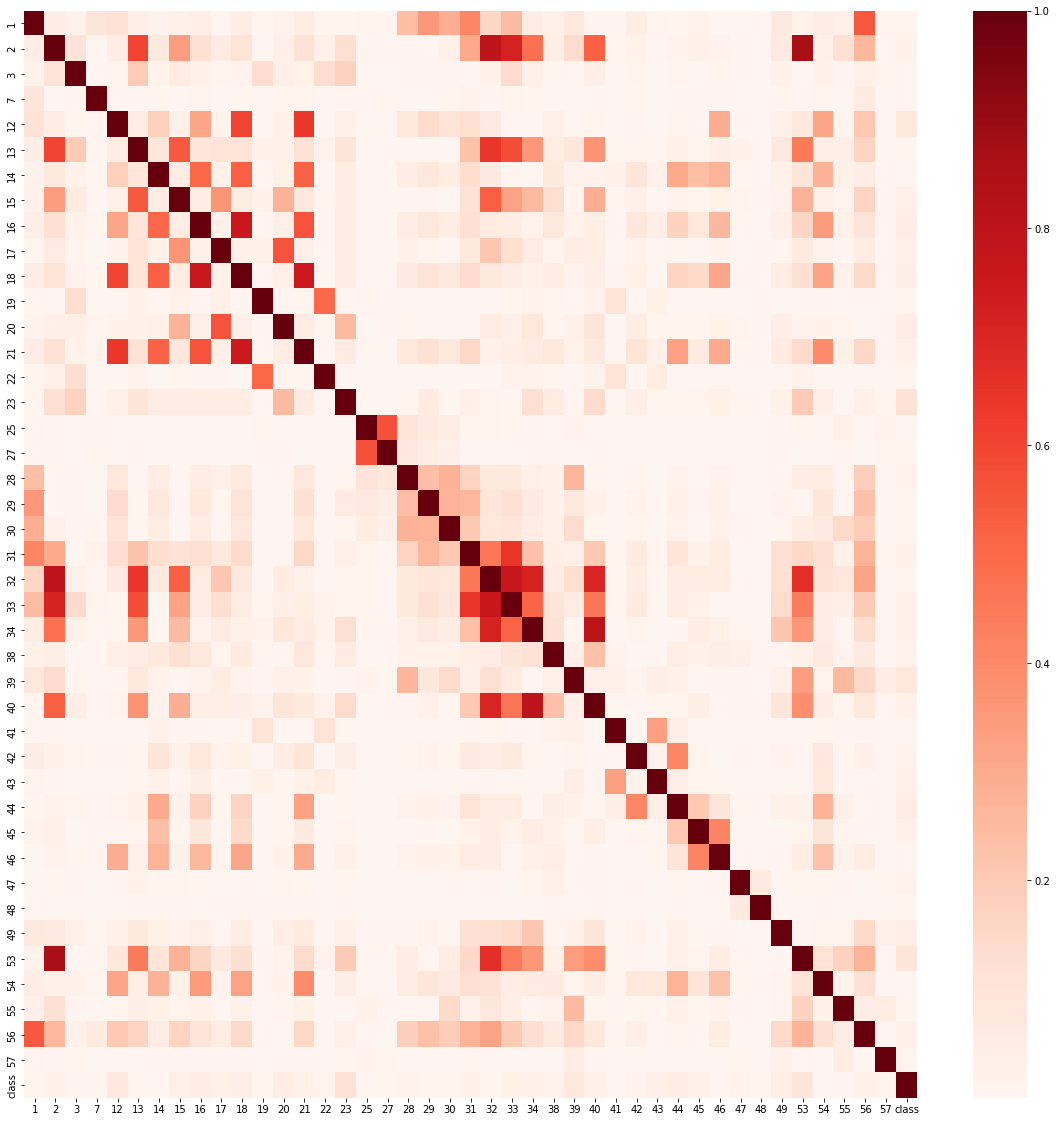

In [196]:
plt.figure(figsize=(20,20))
cor = df.corr()

# Opcode names can be found at: 
# https://github.com/thais-damasio/obfuscation/blob/main/dataset/opcodes.csv
abs_cor = abs(cor)
sns.heatmap(abs_cor, cmap=plt.cm.Reds)

#### **6) Split the dataset into a training and test set**

In [197]:
t = df.sample(frac=0.8, random_state=0)

y_train = t.pop("class")
x_train = t

t = df.drop(t.index)
y_test = t.pop("class")
x_test = t

#### **7) Model**

In [198]:
nclass = y_train.nunique()
nfeatures = len(x_train.columns)

model = Sequential([
  Input(shape=(nfeatures,), name="input"),
  Dense(1, use_bias=True, name="fc1", activation="relu"),
  Dense(nclass, use_bias=True, activation='softmax', name="output")
], name="OBF")

optimizer = keras.optimizers.Adam(
    # Learning rate
    learning_rate=0.01,
    # The exponential decay rate for the first moment estimates
    beta_1=0.9, 
    # The exponential decay rate for the second-moment estimates 
    beta_2=0.99, 
    # Very small number to prevent any division by zero in Adam algorithm
    epsilon=1e-7,
)

model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "OBF"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 1)                 43        
                                                                 
 output (Dense)              (None, 104)               208       
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


#### **8) Training**

In [199]:
model.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
1300/1300 [==============================] - 3s 2ms/step - loss: 3553.5662 - accuracy: 0.0094
Epoch 2/20
1300/1300 [==============================] - 2s 2ms/step - loss: 3553.5662 - accuracy: 0.0090
Epoch 3/20
1300/1300 [==============================] - 2s 2ms/step - loss: 3553.5674 - accuracy: 0.0099
Epoch 4/20
1300/1300 [==============================] - 2s 2ms/step - loss: 3553.5652 - accuracy: 0.0096
Epoch 5/20
1300/1300 [==============================] - 2s 2ms/step - loss: 3553.5635 - accuracy: 0.0096
Epoch 6/20
1300/1300 [==============================] - 2s 2ms/step - loss: 3553.5681 - accuracy: 0.0091
Epoch 7/20
1300/1300 [==============================] - 2s 2ms/step - loss: 3553.5667 - accuracy: 0.0096
Epoch 8/20
1300/1300 [==============================] - 2s 2ms/step - loss: 3553.5662 - accuracy: 0.0098
Epoch 9/20
1300/1300 [==============================] - 2s 2ms/step - loss: 3553.5669 - accuracy: 0.0100
Epoch 10/20
1300/1300 [==============================] 

#### **9) Test**

Test accuarcy: 1.00%



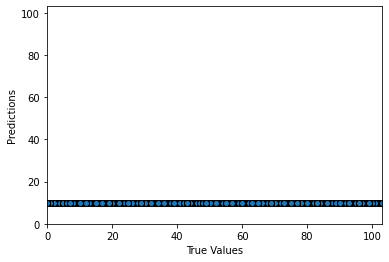

In [200]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuarcy: {:0.2f}%\n'.format(score[1] * 100))

y_hat = model.predict(x_test)
y = []
for i in range(len(y_hat)):
  index_max = max(range(len(y_hat[i])), key=y_hat[i].__getitem__)
  y.append(index_max)
  
fig, ax = plt.subplots(1,1)
ax.set(xlim=(0, 103), ylim=(0, 103))
ax.set_xlabel('True Values')
ax.set_ylabel('Predictions')
ax.scatter(y_test, y, edgecolors=(0, 0, 0))